In [3]:
import pandas as pd

df2 = pd.read_csv('df2.csv')
df2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,0,50,21.967120,0,1
1,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1,0
2,2,18857,130,70,3,1,0,0,0,1,51,23.507805,1,0
3,3,17623,150,100,1,1,0,0,1,1,48,28.710479,0,1
4,4,17474,100,60,1,1,0,0,0,0,47,23.011177,1,0


## Train|validation|test split

In [4]:
from sklearn.model_selection import train_test_split

# separate the features and the target
X = df2.drop('cardio', axis=1)
y = df2['cardio']

display(X.head(), y.head())

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,50,21.967120,0,1
1,1,20228,140,90,3,1,0,0,1,55,34.927679,1,0
2,2,18857,130,70,3,1,0,0,0,51,23.507805,1,0
3,3,17623,150,100,1,1,0,0,1,48,28.710479,0,1
4,4,17474,100,60,1,1,0,0,0,47,23.011177,1,0


0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train|validation split on the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Feature standardization using StandardScaler:

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Fit the scaler on the training data
scaler_standard.fit(X_train)

# Transform the training, validation, and test sets
X_train_standard = scaler_standard.transform(X_train)
X_val_standard = scaler_standard.transform(X_val)
X_test_standard = scaler_standard.transform(X_test)

X_train_standard.shape, X_val_standard.shape, X_test_standard.shape

((43996, 13), (11000, 13), (13749, 13))

## Feature normalization using MinMaxScaler:

In [7]:
# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit the scaler on the training data
scaler_minmax.fit(X_train)

# Transform the training, validation, and test sets
X_train_normalized = scaler_minmax.transform(X_train)
X_val_normalized = scaler_minmax.transform(X_val)
X_test_normalized = scaler_minmax.transform(X_test)

X_train_normalized.shape, X_val_normalized.shape, X_test_normalized.shape

((43996, 13), (11000, 13), (13749, 13))

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for the logistic regression model
param_grid_lr = {
    'C': [0.1, 1, 10], 
    'solver': ['newton-cg', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 500]
}

## GridSearchCV for Logistic Regression

In [27]:
# Create a logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create the grid search object
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', cv=5)

# Fit the grid search object to the standardized training data
grid_search_lr.fit(X_train_standard, y_train)

# Fit the grid search object to the normalized training data
grid_search_lr_normalized = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', cv=5) 
grid_search_lr_normalized.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='accuracy')

In [10]:
# standard scaler
print("Best parameters found:", grid_search_lr.best_params_)
print("Best accuracy score:", grid_search_lr.best_score_) 

Best parameters found: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy score: 0.7264752037938196


In [11]:
# minmax scaler
print("Best parameters found:", grid_search_lr_normalized.best_params_)
print("Best accuracy score:", grid_search_lr_normalized.best_score_)

Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score: 0.7266115829278121


## Prediction using the validation data

In [12]:
# Get the best logistic regression model found by grid search
best_lr_model = grid_search_lr.best_estimator_

# Make predictions on the validation dataset using the best logistic regression model
lr_val_predictions = best_lr_model.predict(X_val_standard)

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid for KNN model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

## GridSearchCV for KNN

In [14]:
# Create a KNN model
knn_model = KNeighborsClassifier()

# Create the grid search object
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, scoring='accuracy', cv=5)

# Fit the grid search object to the standardized training data
grid_search_knn.fit(X_train_standard, y_train)

# Fit the grid search object to the normalized training data
grid_search_knn_normalized = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn_normalized.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
# standard scaler
print("Best parameters found:", grid_search_knn.best_params_)
print("Best accuracy score:", grid_search_knn.best_score_)

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best accuracy score: 0.7159287651489322


In [15]:
# minmax scaler
print("Best parameters found:", grid_search_knn_normalized.best_params_)
print("Best accuracy score:", grid_search_knn_normalized.best_score_)

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best accuracy score: 0.7097463658060317


## Prediction using the validation data

In [26]:
# Get the best KNN model found by grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the validation dataset using the best KNN model
knn_val_predictions = best_knn_model.predict(X_val_standard)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid for the decision tree model
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 15],
    "min_samples_split": [2, 3, 5, 7, 9, 11, 15],
    "min_samples_leaf": [1, 2, 3, 5, 7, 9, 11, 15],
}

## GridSearchCV for decision tree

In [18]:
# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create the grid search object
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', cv=5)

# Fit the grid search object to the standardized training data
grid_search_dt.fit(X_train_standard, y_train)

# Fit the grid search object to the normalized training data
grid_search_dt_normalized = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', cv=5)
grid_search_dt_normalized.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 9, 11, 15],
                         'min_samples_split': [2, 3, 5, 7, 9, 11, 15]},
             scoring='accuracy')

In [19]:
# standard scaler
print("Best parameters found:", grid_search_dt.best_params_)
print("Best accuracy score:", grid_search_dt.best_score_)

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best accuracy score: 0.7290664228373058


In [20]:
# minmax scaler
print("Best parameters found:", grid_search_dt_normalized.best_params_)
print("Best accuracy score:", grid_search_dt_normalized.best_score_)

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best accuracy score: 0.7290664228373058


## Prediction using the validation data

In [25]:
# Get the best Decision Tree model found by grid search
best_dt_model = grid_search_dt.best_estimator_ 

# Make predictions on the validation dataset using the best decision tree model
dt_val_predictions = best_dt_model.predict(X_val_standard) 

## Calculate the accuracy score for the validation data using all three models

In [22]:
from sklearn.metrics import accuracy_score

lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)
dt_val_accuracy = accuracy_score(y_val, dt_val_predictions)

print("Logistic Regression validation accuracy:", lr_val_accuracy)
print("KNN validation accuracy:", knn_val_accuracy)
print("Decision Tree validation accuracy:", dt_val_accuracy)

Logistic Regression validation accuracy: 0.7294545454545455
KNN validation accuracy: 0.7204545454545455
Decision Tree validation accuracy: 0.731


## Dataframe and final model selection

|                      | Logestic Reg | KNN         | Decision Tree |
| -----                | --------     |----         |--------       |
| df1 (accuracy score) | 0.704        | 0.686       | 0.697         |
| df2 (accuracy score) | 0.729        | 0.720       | 0.731         |
                       
Based on the accuracy score, the best model is Decision Tree with the df2 data.

## Use the chosen model and train it on the entire data, except the test data

In [32]:
# combine the training and validation data
X_train_val = pd.concat([X_train, X_val], axis=0, ignore_index=True)
y_train_val = pd.concat([y_train, y_val], axis=0, ignore_index=True)

X_train_val.shape, y_train_val.shape

((54996, 13), (54996,))

In [33]:
# Fit the best decision tree model to the combined training and validation data
best_dt_model.fit(X_train_val, y_train_val)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)

## Voting Classifier

In [35]:
from sklearn.ensemble import VotingClassifier

# Create the VotingClassifier object with the best models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr_model),
        ('knn', best_knn_model),
        ('dt', best_dt_model)
    ],
    voting='hard'
)

# Fit the VotingClassifier on the combined training and validation data
voting_clf.fit(X_train_val, y_train_val)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, random_state=42)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=15)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=15,
                                                     random_state=42))])

## Evaluation

In [37]:
# Make prediction on the test data using the best decision tree model and the voting classifier
dt_test_predictions = best_dt_model.predict(X_test)
voting_test_predictions = voting_clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt_confusion_matrix = confusion_matrix(y_test, dt_test_predictions) # confusion matrix for the best decision tree model
voting_confusion_matrix = confusion_matrix(y_test, voting_test_predictions) # confusion matrix for the voting classifier

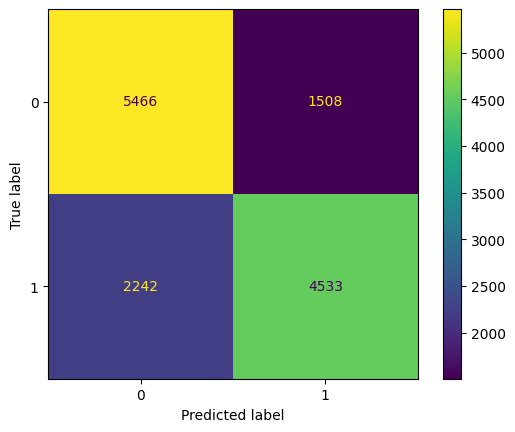

In [54]:
ConfusionMatrixDisplay(dt_confusion_matrix, display_labels = ['0', '1']).plot()

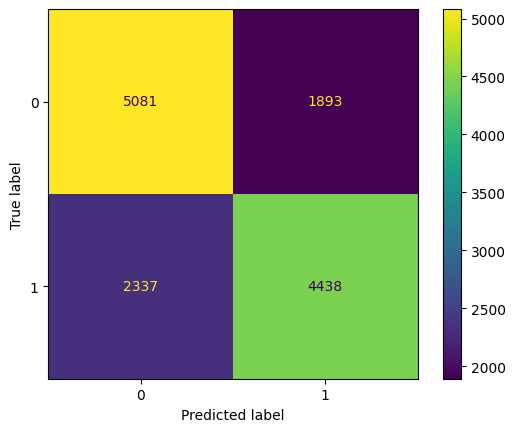

In [55]:
ConfusionMatrixDisplay(voting_confusion_matrix, display_labels = ['0', '1']).plot()

In [48]:
from sklearn.metrics import classification_report

dt_classification_report = classification_report(y_test, dt_test_predictions) # classification report for the best decision tree model
voting_classification_report = classification_report(y_test, voting_test_predictions) # classification report for the voting classifier

In [49]:
print("Decision Tree Classification Report:\n", dt_classification_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      6974
           1       0.75      0.67      0.71      6775

    accuracy                           0.73     13749
   macro avg       0.73      0.73      0.73     13749
weighted avg       0.73      0.73      0.73     13749



In [50]:
print("Voting Classifier Classification Report:\n", voting_classification_report)

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71      6974
           1       0.70      0.66      0.68      6775

    accuracy                           0.69     13749
   macro avg       0.69      0.69      0.69     13749
weighted avg       0.69      0.69      0.69     13749

